In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time


In [83]:
import warnings
warnings.filterwarnings('ignore')

In [137]:
from bs4 import BeautifulSoup
import requests
import re

In [3]:
url = 'https://www.amazon.in/s?k=Mobiles&rh=n%3A1389401031&ref=nb_sb_noss'

In [4]:
Soup = requests.get(url)

In [5]:
Soup.status_code

200

In [6]:
soup = BeautifulSoup(Soup.content)

In [119]:
Model_Name =[]
Brand = []
Review = []
Display = []
Price = []
for i in range(1,25):
    start_time = time.time()
    
    SmartPhones = soup.findAll('div',{'class':'sg-col-inner'})
    for x in SmartPhones:
        mobiles = x.findAll('a',{'class':'a-link-normal a-text-normal'})
        for y in mobiles:
            if y.text is None:
                Model_Name.append(np.nan)
            else:
                Model_Name.append(y.text)
      
    
        review = x.findAll('div',{'class':'a-section a-spacing-none a-spacing-top-micro'})
        for z in review:
            if z.text is None:
                Review.append(np.nan)
            else:
                Review.append(z.text)
        
        price = x.findAll('span',{'class':'a-price-whole'})
        for n in price:
            if n.text is None:
                Price.append(np.nan)
            else:
                Price.append(n.text)
            
    
            
            

In [122]:
len(Model_Name)

1152

In [126]:
Review = Review[::2]

In [127]:
Mobile_Data = pd.DataFrame({'Model':Model_Name,'Review':Review,'Price':Price})

In [132]:
Mobile_Data['Model'] = Mobile_Data['Model'].apply(lambda x : re.findall('[A-z].+',x))

In [133]:
Mobile_Data['Review'] = Mobile_Data['Review'].apply(lambda x: re.findall('\d\.\d ',x))

In [134]:
Mobile_Data['Review'] = Mobile_Data['Review'].apply(lambda x :''.join(x) )

In [135]:
Mobile_Data['Price']

0        6,799
1        8,799
2       10,999
3       16,499
4        6,199
         ...  
1147     6,799
1148    14,999
1149    29,999
1150    29,999
1151    10,999
Name: Price, Length: 1152, dtype: object

In [125]:
import joblib
joblib.dump(Mobile_Data,'Mobile_Data.pkl')

['Mobile_Data.pkl']

In [126]:
import joblib
Mobile_Data = joblib.load('Mobile_Data.pkl')

In [8]:
Mobile_Data['Model'] = Mobile_Data['Model'].apply(lambda x:''.join(x))

In [32]:
Mobile_Data['Storage'] = Mobile_Data['Model'].apply(lambda x:re.findall('[0-9]+GB',x))

In [36]:
Mobile_Data['Ram'] =  Mobile_Data['Storage'].str[0]

In [39]:
Mobile_Data['Capacity'] = Mobile_Data['Storage'].str[1]

In [47]:
Mobile_Data['Brand'] = Mobile_Data['Model'].apply(lambda x: re.findall('^\w+',x))

In [177]:
Mobile_Data['Brand'] = Mobile_Data['Brand'].apply(lambda x :''.join(x))

In [159]:
Mobile_Data['Color'] = Mobile_Data['Model'].apply(lambda x: re.findall('\([[A-z]+ [A-z]+|\([A-z]+',x))

In [160]:
Mobile_Data['Color'] = Mobile_Data['Color'].apply(lambda x : ''.join(x))


In [161]:
Mobile_Data['Color'] = Mobile_Data['Color'].apply(lambda x : re.findall('\w.+',x))

In [171]:
Mobile_Data['Price'] = Mobile_Data['Price'].apply(lambda x : x.replace(',',''))
Mobile_Data['Price'] = Mobile_Data['Price'].apply(lambda x : int(x))

In [180]:
Mobile_Data

,Model,Review,Price,Storage,Ram,Capacity,Brand,Color
0,"Redmi 9A (Nature Green, 2GB Ram, 32GB Storage)...",4.2,6799,"[2GB, 32GB]",2GB,32GB,Redmi,[Nature Green]
1,"Redmi 9 (Sky Blue, 4GB RAM, 64GB Storage)",4.2,8799,"[4GB, 64GB]",4GB,64GB,Redmi,[Sky Blue]
2,"Redmi Note 9 (Pebble Grey, 4GB RAM 64GB Storag...",4.2,10999,"[4GB, 64GB]",4GB,64GB,Redmi,[Pebble Grey]
3,"Samsung Galaxy M31 (Ocean Blue, 6GB RAM, 128GB...",4.3,16499,"[6GB, 128GB]",6GB,128GB,Samsung,[Ocean Blue]
4,"Samsung Galaxy M01 Core (Black, 2GB RAM, 32GB ...",3.6,6199,"[2GB, 32GB]",2GB,32GB,Samsung,[Black]
...,...,...,...,...,...,...,...,...
1147,"Redmi 9A (Sea Blue, 2GB Ram, 32GB Storage) | 2...",4.2,6799,"[2GB, 32GB]",2GB,32GB,Redmi,[Sea Blue]
1148,"Redmi Note 9 Pro Max (Interstellar Black, 6GB ...",4.2,14999,"[6GB, 64GB]",6GB,64GB,Redmi,[Interstellar Black]
1149,"OnePlus Nord 5G (Blue Marble, 12GB RAM, 256GB ...",4.3,29999,"[12GB, 256GB]",12GB,256GB,OnePlus,[Blue Marble]
1150,"OnePlus Nord 5G (Gray Onyx, 12GB RAM, 256GB St...",4.3,29999,"[12GB, 256GB]",12GB,256GB,OnePlus,[Gray Onyx]


<AxesSubplot:xlabel='Brand', ylabel='Price'>

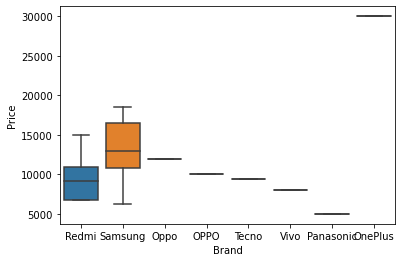

In [179]:
sns.boxplot(x=Mobile_Data['Brand'] , y = Mobile_Data['Price'])

In [182]:
pd.crosstab(index = Mobile_Data['Ram'], columns =Mobile_Data['Brand'] )

Brand,OPPO,OnePlus,Oppo,Panasonic,Redmi,Samsung,Tecno,Vivo
Ram,,,,,,,,
12GB,0,96,0,0,0,0,0,0
2GB,0,0,0,48,96,48,0,96
4GB,96,0,0,0,144,144,48,0
6GB,0,0,96,0,48,192,0,0


In [206]:
pd.crosstab(index = Mobile_Data['Capacity'], columns =Mobile_Data['Brand'] )

Brand,OPPO,OnePlus,Oppo,Panasonic,Redmi,Samsung,Tecno,Vivo
Capacity,,,,,,,,
128GB,0,0,96,0,0,192,0,0
16GB,0,0,0,48,0,0,0,0
256GB,0,96,0,0,0,0,0,0
32GB,0,0,0,0,96,48,0,96
64GB,96,0,0,0,192,144,48,0


<AxesSubplot:>

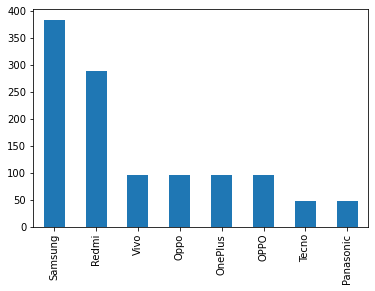

In [188]:
Mobile_Data['Brand'].value_counts().plot.bar()

<AxesSubplot:xlabel='Brand', ylabel='Review'>

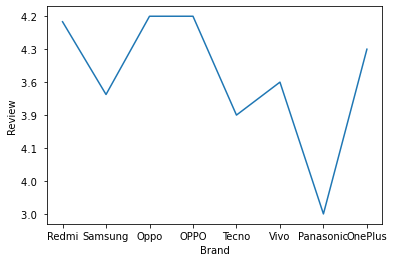

In [209]:
sns.lineplot(x = Mobile_Data['Brand'], y = Mobile_Data['Review'] ,ci =None)

In [224]:
Mobile_Data.groupby(by = 'Brand')['Brand'].count()

Brand
OPPO          96
OnePlus       96
Oppo          96
Panasonic     48
Redmi        288
Samsung      384
Tecno         48
Vivo          96
Name: Brand, dtype: int64

<AxesSubplot:ylabel='Brand'>

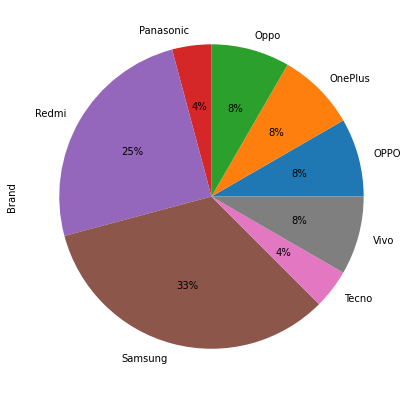

In [225]:
plt.figure(figsize =(7,7))
Mobile_Data.groupby(by = 'Brand')['Brand'].count().plot.pie(autopct = '%0.00f%%')